In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## TRACE groupby DAY: idea sea if we can spot patterns created by the 2 datasets

In [5]:
cols=["d","i","m","T","P"]
trace=pd.read_csv("TRACE.csv",names=cols)
trace

,d,i,m,T,P
0,1,1,1,-1,99.999674
1,1,2,3,-1,99.999526
2,1,3,3,-1,99.999904
3,1,4,2,-1,99.999909
4,1,5,3,1,100.000275
...,...,...,...,...,...
24995,250,96,1,-1,102.280724
24996,250,97,1,-1,102.611294
24997,250,98,2,-1,102.611294
24998,250,99,1,-1,102.611294


In [14]:
trace_group=trace.groupby("d").mean().reset_index()
trace_group

,d,i,m,T,P
0,1,50.5,2.07,-0.42,99.999910
1,2,50.5,1.83,-1.00,100.999505
2,3,50.5,2.10,0.42,100.000316
3,4,50.5,1.31,1.00,99.202222
4,5,50.5,1.60,-1.00,99.801197
...,...,...,...,...,...
245,246,50.5,1.59,1.00,101.490076
246,247,50.5,1.59,1.00,102.498735
247,248,50.5,1.60,0.42,103.085647
248,249,50.5,1.89,-0.42,101.923546


<AxesSubplot:xlabel='d'>

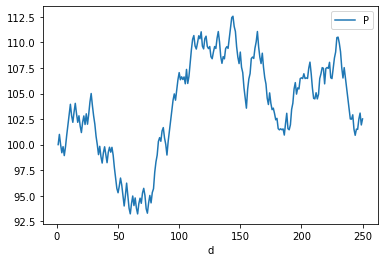

In [13]:
trace_group.plot("d","P")

In [17]:
trace_group["P_round"]=round(trace_group["P"])
trace_group

,d,i,m,T,P,P_round
0,1,50.5,2.07,-0.42,99.999910,100.0
1,2,50.5,1.83,-1.00,100.999505,101.0
2,3,50.5,2.10,0.42,100.000316,100.0
3,4,50.5,1.31,1.00,99.202222,99.0
4,5,50.5,1.60,-1.00,99.801197,100.0
...,...,...,...,...,...,...
245,246,50.5,1.59,1.00,101.490076,101.0
246,247,50.5,1.59,1.00,102.498735,102.0
247,248,50.5,1.60,0.42,103.085647,103.0
248,249,50.5,1.89,-0.42,101.923546,102.0


### try to replicate the random walk of the value

<AxesSubplot:xlabel='d'>

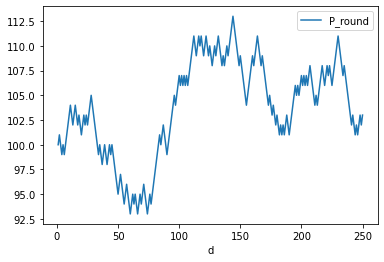

In [19]:
trace_group.plot("d","P_round")

In [20]:
trace_group["P_res"]=trace_group["P"]-trace_group["P_round"]
trace_group

,d,i,m,T,P,P_round,P_res
0,1,50.5,2.07,-0.42,99.999910,100.0,-0.000090
1,2,50.5,1.83,-1.00,100.999505,101.0,-0.000495
2,3,50.5,2.10,0.42,100.000316,100.0,0.000316
3,4,50.5,1.31,1.00,99.202222,99.0,0.202222
4,5,50.5,1.60,-1.00,99.801197,100.0,-0.198803
...,...,...,...,...,...,...,...
245,246,50.5,1.59,1.00,101.490076,101.0,0.490076
246,247,50.5,1.59,1.00,102.498735,102.0,0.498735
247,248,50.5,1.60,0.42,103.085647,103.0,0.085647
248,249,50.5,1.89,-0.42,101.923546,102.0,-0.076454


<AxesSubplot:xlabel='d'>

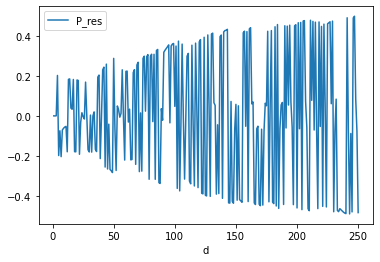

In [21]:
trace_group.plot("d","P_res")

<AxesSubplot:xlabel='P_res', ylabel='Density'>

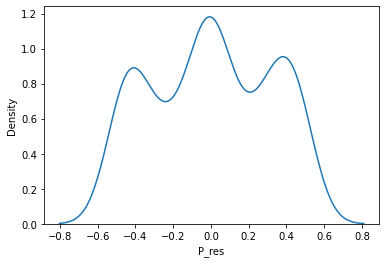

In [23]:
sns.kdeplot(data=trace_group, x="P_res")

<AxesSubplot:xlabel='d'>

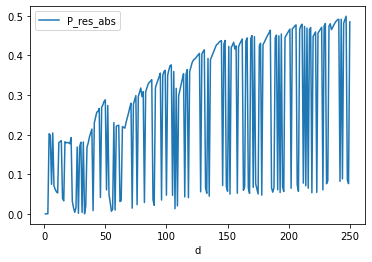

In [26]:
trace_group["P_res_abs"]=abs(trace_group["P_res"])
trace_group.plot("d","P_res_abs")

trend may be explained by the adaptation of the dealers

<AxesSubplot:xlabel='P_res_abs', ylabel='Density'>

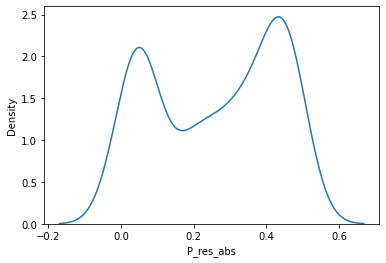

In [27]:
sns.kdeplot(data=trace_group, x="P_res_abs")

Idea: <br>
0 --> data 1 & 2 give the same signal <br>
0.5 --> data 1 & 2 give different signals

<AxesSubplot:xlabel='P_res_abs', ylabel='Count'>

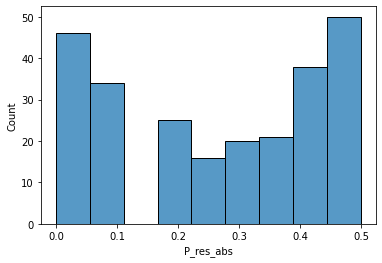

In [29]:
sns.histplot(data=trace_group, x="P_res_abs")

# EDA on data

In [2]:
col_data=["d","s","v"]
data1=pd.read_csv("Data1.csv",names=col_data)
data1

,d,s,v
0,1,0,101
1,2,0,100
2,3,1,99
3,4,1,100
4,5,0,99
...,...,...,...
245,246,1,102
246,247,1,103
247,248,1,102
248,249,0,103


In [3]:
data1["e"]=(data1["v"]-data1["v"].shift(periods=1, fill_value=100)+1)/2
data1

,d,s,v,e
0,1,0,101,1.0
1,2,0,100,0.0
2,3,1,99,0.0
3,4,1,100,1.0
4,5,0,99,0.0
...,...,...,...,...
245,246,1,102,1.0
246,247,1,103,1.0
247,248,1,102,0.0
248,249,0,103,1.0


In [4]:
data1["right_prediction"]=(data1["s"]==data1["e"])
data1

,d,s,v,e,right_prediction
0,1,0,101,1.0,False
1,2,0,100,0.0,True
2,3,1,99,0.0,False
3,4,1,100,1.0,True
4,5,0,99,0.0,True
...,...,...,...,...,...
245,246,1,102,1.0,True
246,247,1,103,1.0,True
247,248,1,102,0.0,False
248,249,0,103,1.0,False


estimation tau1

In [5]:
p1=data1["right_prediction"].mean()
n=data1.shape[0]
#alpha 5%, n*(1-p1)=250*0.28=70>>5
pmax=p1+1.96*np.sqrt(p1*(1-p1)/n)
pmin=p1-1.96*np.sqrt(p1*(1-p1)/n)
print(pmin-0.5)
print(p1-0.5)
print(pmax-0.5)

0.16434152140059877
0.21999999999999997
0.2756584785994012


In [6]:
col_data=["d","s","v"]
data2=pd.read_csv("Data2.csv",names=col_data)
data2["e"]=(data2["v"]-data2["v"].shift(periods=1, fill_value=100)+1)/2
data2["right_prediction"]=(data2["s"]==data2["e"])
p2=data2["right_prediction"].mean()
n=data2.shape[0]
#alpha 5%, n*(1-p2)=250*0.1=25>>5
pmax=p2+1.96*np.sqrt(p2*(1-p2)/n)
pmin=p2-1.96*np.sqrt(p2*(1-p2)/n)
print(pmin-0.5)
print(p2-0.5)
print(pmax-0.5)

0.3628116147164199
0.4
0.43718838528358017


In [7]:
n=250
S0=np.random.uniform(0.001)
tau=0.22
p=0.5+tau
W=np.random.choice(2,n,p=[1-p,p])
win_rate=np.divide(np.cumsum(W),np.arange(1,n+1))
win_rate

array([0.        , 0.5       , 0.33333333, 0.5       , 0.6       ,
       0.5       , 0.57142857, 0.625     , 0.66666667, 0.6       ,
       0.63636364, 0.66666667, 0.61538462, 0.57142857, 0.6       ,
       0.625     , 0.64705882, 0.66666667, 0.68421053, 0.7       ,
       0.71428571, 0.72727273, 0.69565217, 0.70833333, 0.72      ,
       0.73076923, 0.74074074, 0.75      , 0.72413793, 0.73333333,
       0.74193548, 0.75      , 0.72727273, 0.70588235, 0.71428571,
       0.69444444, 0.7027027 , 0.71052632, 0.71794872, 0.725     ,
       0.70731707, 0.71428571, 0.72093023, 0.72727273, 0.73333333,
       0.73913043, 0.74468085, 0.75      , 0.75510204, 0.76      ,
       0.76470588, 0.76923077, 0.77358491, 0.75925926, 0.74545455,
       0.73214286, 0.73684211, 0.74137931, 0.72881356, 0.73333333,
       0.73770492, 0.72580645, 0.73015873, 0.734375  , 0.73846154,
       0.74242424, 0.73134328, 0.73529412, 0.73913043, 0.74285714,
       0.74647887, 0.73611111, 0.73972603, 0.74324324, 0.74666

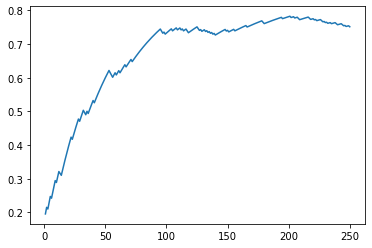

In [8]:
X=np.arange(1,n+1)
beta=0.025
S=0.2*np.exp(-beta*X)+(1-np.exp(-beta*X))*win_rate
plt.plot(X,S)

In [155]:
profit=W-S

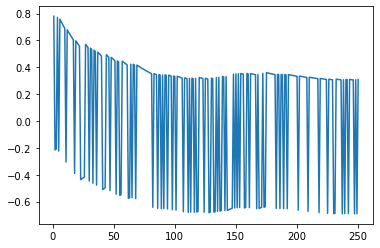

In [156]:
plt.plot(X,profit)

In [157]:
profit_cum=np.cumsum(profit)

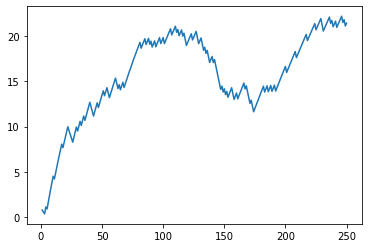

In [158]:
plt.plot(X,profit_cum)

In [10]:
def generate_dealer(n,tau):
    S0=np.random.uniform(0.001)
    p=0.5+tau
    X=np.arange(1,n+1)
    W=np.random.choice(2,n,p=[1-p,p]) #sortir w si plusieurs dealer
    win_rate=np.divide(np.cumsum(W),X)
    beta=0.025
    S=0.2*np.exp(-beta*X)+(1-np.exp(-beta*X))*win_rate
    profit=2*W-1-S
    profit_cum=np.cumsum(profit)
    return X,S,profit_cum,profit
    

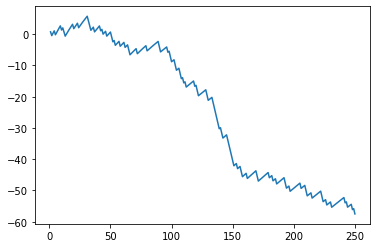

In [25]:
X,S,profit_cum,profit=generate_dealer(n,0.22)
plt.plot(X,profit_cum)

In [26]:
S_moy=np.zeros(250)
profit_cum_moy=np.zeros(250)
profit_moy=np.zeros(250)
for _ in range(100000):
    X,S,profit_cum,profit=generate_dealer(n,0.22)
    S_moy+=S
    profit_cum_moy+=profit_cum
    profit_moy+=profit
profit_cum_moy=profit_cum_moy/100000
S_moy=S_moy/100000
profit_moy=profit_moy/100000

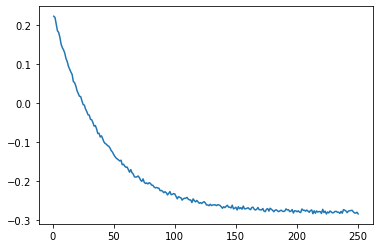

In [27]:
plt.plot(X,profit_moy)

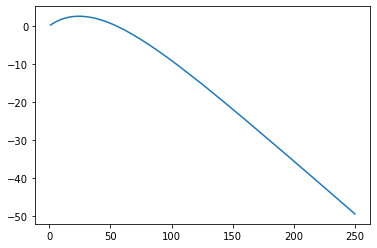

In [28]:
plt.plot(X,profit_cum_moy)

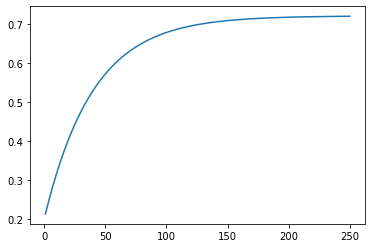

In [29]:
plt.plot(X,S_moy)

In [189]:
profit_cum[-1]

16.779882020531737

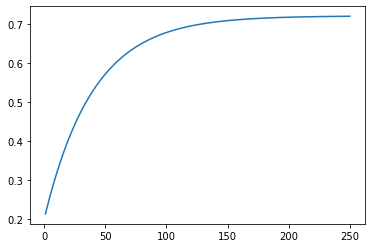

In [190]:
#esperance de S
S_esp=0.2*np.exp(-beta*X)+(1-np.exp(-beta*X))*p
plt.plot(X,S_esp)

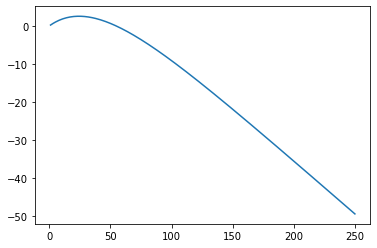

In [200]:
profit_cum_esp=X*(2*p-1)-np.cumsum(0.2*np.exp(-beta*X)+(1-np.exp(-beta*X))*p)
plt.plot(X,profit_cum_esp)

In [182]:
p

0.72

In [197]:
X*(2*p-1)

array([  0.44,   0.88,   1.32,   1.76,   2.2 ,   2.64,   3.08,   3.52,
         3.96,   4.4 ,   4.84,   5.28,   5.72,   6.16,   6.6 ,   7.04,
         7.48,   7.92,   8.36,   8.8 ,   9.24,   9.68,  10.12,  10.56,
        11.  ,  11.44,  11.88,  12.32,  12.76,  13.2 ,  13.64,  14.08,
        14.52,  14.96,  15.4 ,  15.84,  16.28,  16.72,  17.16,  17.6 ,
        18.04,  18.48,  18.92,  19.36,  19.8 ,  20.24,  20.68,  21.12,
        21.56,  22.  ,  22.44,  22.88,  23.32,  23.76,  24.2 ,  24.64,
        25.08,  25.52,  25.96,  26.4 ,  26.84,  27.28,  27.72,  28.16,
        28.6 ,  29.04,  29.48,  29.92,  30.36,  30.8 ,  31.24,  31.68,
        32.12,  32.56,  33.  ,  33.44,  33.88,  34.32,  34.76,  35.2 ,
        35.64,  36.08,  36.52,  36.96,  37.4 ,  37.84,  38.28,  38.72,
        39.16,  39.6 ,  40.04,  40.48,  40.92,  41.36,  41.8 ,  42.24,
        42.68,  43.12,  43.56,  44.  ,  44.44,  44.88,  45.32,  45.76,
        46.2 ,  46.64,  47.08,  47.52,  47.96,  48.4 ,  48.84,  49.28,
      

In [199]:
np.cumsum(0.2*np.exp(-beta*X)+(1-np.exp(-beta*X))*p)

array([  0.21283885,   0.43819955,   0.67577293,   0.92525747,
         1.18635909,   1.45879094,   1.74227329,   2.0365333 ,
         2.34130486,   2.65632845,   2.98135095,   3.31612548,
         3.66041125,   4.01397344,   4.37658302,   4.7480166 ,
         5.12805631,   5.51648967,   5.91310944,   6.3177135 ,
         6.73010471,   7.15009081,   7.57748427,   8.01210222,
         8.45376628,   8.90230248,   9.35754114,   9.81931678,
        10.287468  ,  10.7618374 ,  11.24227143,  11.72862037,
        12.22073817,  12.71848241,  13.22171416,  13.73029793,
        14.2441016 ,  14.76299626,  15.28685624,  15.81555893,
        16.34898477,  16.88701714,  17.42954231,  17.97644934,
        18.52763006,  19.08297894,  19.64239307,  20.20577208,
        20.77301808,  21.34403558,  21.91873148,  22.49701495,
        23.07879741,  23.66399247,  24.25251588,  24.84428546,
        25.43922106,  26.03724451,  26.63827957,  27.24225189,
        27.84908894,  28.45871999,  29.07107607,  29.68

In [201]:
np.ones(n)*(2*p-1)-0.2*np.exp(-beta*X)+(1-np.exp(-beta*X))*p

array([0.26271488, 0.28486893, 0.30647599, 0.32754958, 0.34810285,
       0.36814866, 0.38769954, 0.40676771, 0.42536508, 0.44350328,
       0.46119365, 0.47844724, 0.49527483, 0.51168696, 0.52769386,
       0.54330556, 0.5585318 , 0.5733821 , 0.58786575, 0.60199179,
       0.61576906, 0.62920617, 0.64231152, 0.65509329, 0.66755949,
       0.67971789, 0.69157609, 0.70314152, 0.7144214 , 0.72542277,
       0.73615252, 0.74661735, 0.75682381, 0.76677826, 0.77648694,
       0.78595591, 0.79519109, 0.80419826, 0.81298303, 0.82155091,
       0.82990725, 0.83805727, 0.84600607, 0.8537586 , 0.86131973,
       0.86869417, 0.87588654, 0.88290133, 0.88974292, 0.89641559,
       0.90292351, 0.90927075, 0.91546128, 0.92149896, 0.92738757,
       0.93313079, 0.93873221, 0.94419533, 0.94952357, 0.95472025,
       0.95978863, 0.96473186, 0.96955305, 0.9742552 , 0.97884126,
       0.98331408, 0.98767647, 0.99193116, 0.99608079, 1.00012797,
       1.00407523, 1.00792502, 1.01167977, 1.01534181, 1.01891

In [203]:
0.2*np.exp(-beta*X)+(1-np.exp(-beta*X))*p

array([0.21283885, 0.2253607 , 0.23757339, 0.24948454, 0.26110161,
       0.27243185, 0.28348235, 0.29426001, 0.30477157, 0.31502359,
       0.3250225 , 0.33477453, 0.34428578, 0.35356219, 0.36260958,
       0.37143358, 0.38003971, 0.38843336, 0.39661977, 0.40460406,
       0.41239121, 0.4199861 , 0.42739347, 0.43461795, 0.44166406,
       0.4485362 , 0.45523866, 0.46177564, 0.46815122, 0.47436939,
       0.48043403, 0.48634894, 0.4921178 , 0.49774424, 0.50323175,
       0.50858378, 0.51380366, 0.51889467, 0.52385998, 0.52870269,
       0.53342584, 0.53803237, 0.54252517, 0.54690704, 0.55118072,
       0.55534888, 0.55941413, 0.56337901, 0.567246  , 0.57101751,
       0.5746959 , 0.57828347, 0.58178246, 0.58519506, 0.58852341,
       0.59176958, 0.5949356 , 0.59802345, 0.60103506, 0.60397232,
       0.60683705, 0.60963105, 0.61235607, 0.61501381, 0.61760593,
       0.62013405, 0.62259975, 0.62500457, 0.62735001, 0.62963755,
       0.63186861, 0.63404458, 0.63616683, 0.63823667, 0.64025

In [206]:
(np.ones(n)*(2*p-1)).sum()

109.99999999999997

In [208]:
(0.2*np.exp(-beta*X)+(1-np.exp(-beta*X))*p).sum()

159.4985702972129